<a href="https://colab.research.google.com/github/DaniaK03/Assignment-5_Webscraping/blob/main/Assignment_6_WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_ebay_deals.csv')

print("dataset:", df.shape)
print("Missing values:\n", df[['price', 'original_price', 'shipping', 'discount_percentage']].isnull().sum())

df_cleaned = df.dropna(subset=['price', 'original_price', 'shipping', 'discount_percentage'])

print("After dropping missing values:", df_cleaned.shape)

dataset: (3975, 7)
Missing values:
 price                  0
original_price         0
shipping               0
discount_percentage    0
dtype: int64
After dropping missing values: (3975, 7)


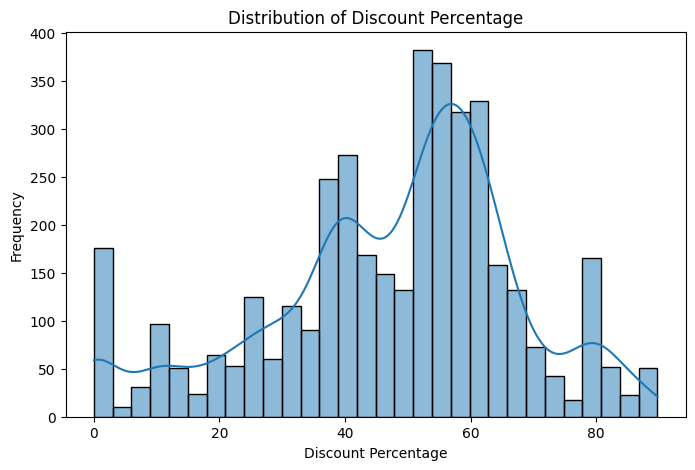

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['discount_percentage'], bins=30, kde=True)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np

def categorize_discount(p):
    if p <= 10:
        return 'Low'
    elif p <= 30:
        return 'Medium'
    else:
        return 'High'

df_cleaned['discount_bin'] = df_cleaned['discount_percentage'].apply(categorize_discount)


bin_counts = df_cleaned['discount_bin'].value_counts()
print("Counts per bin before balancing:\n", bin_counts)

min_count = bin_counts.min()

balanced_df = (
    df_cleaned.groupby('discount_bin')
    .apply(lambda x: x.sample(min_count, random_state=42))
    .reset_index(drop=True)
)


print("\nCounts per bin after balancing:\n", balanced_df['discount_bin'].value_counts())


balanced_df = balanced_df.drop(columns=['discount_bin'])

Counts per bin before balancing:
 discount_bin
High      3226
Medium     488
Low        261
Name: count, dtype: int64

Counts per bin after balancing:
 discount_bin
High      261
Low       261
Medium    261
Name: count, dtype: int64


<ipython-input-30-76765bda4049>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = balanced_df[['price', 'original_price', 'shipping']]
y = balanced_df['discount_percentage']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(balanced_df['shipping'].unique()[:10])

['Shipping info unavailable' 'Free shipping']
Balanced dataset shape: (783, 7)


In [ ]:
def clean_shipping(val):
    if isinstance(val, str):
        val = val.strip().lower()
        if val == 'free shipping':
            return 0.0
        elif val == 'shipping info unavailable':
            return np.nan
        elif val.startswith('$'):
            try:
                return float(val.replace('$', '').replace(',', ''))
            except ValueError:
                return np.nan
    return np.nan

balanced_df['shipping'] = balanced_df['shipping'].apply(clean_shipping)

balanced_df = balanced_df.dropna(subset=['shipping'])



In [ ]:
print("Balanced dataset shape:", balanced_df.shape)

Balanced dataset shape: (783, 7)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Model Evaluation Metrics:
MAE  = 8.16
MSE  = 134.95
RMSE = 11.62
R²   = 0.75


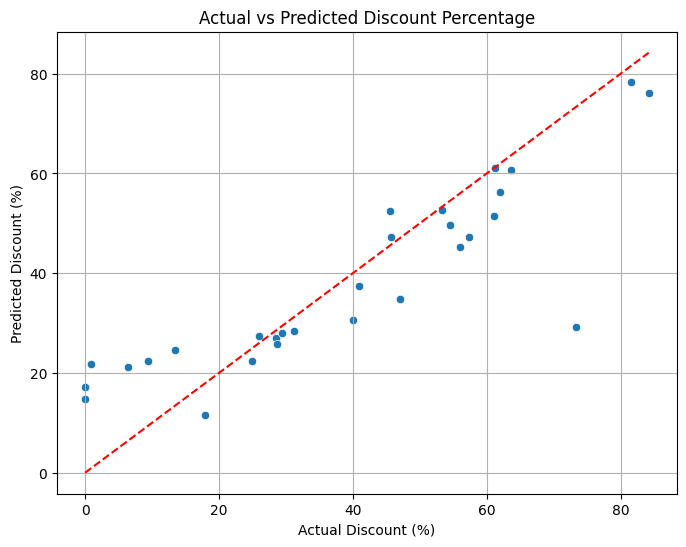

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Discount (%)')
plt.ylabel('Predicted Discount (%)')
plt.title('Actual vs Predicted Discount Percentage')
plt.grid(True)
plt.show()

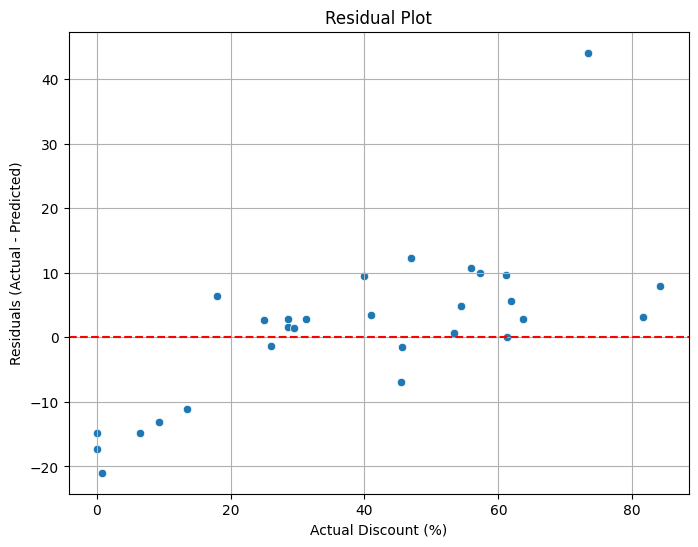

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Discount (%)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [ ]:
print("Balanced dataset shape:", balanced_df.shape)

Balanced dataset shape: (783, 7)


In [ ]:
cols_for_display = ['title', 'price', 'original_price', 'shipping']
result_table = sample[cols_for_display + ['predicted_discount_%']]
result_table['predicted_discount_%'] = result_table['predicted_discount_%'].round(2)
print("Predicted Discounts for 20 Sample Products:")
result_table.style.format({'predicted_discount_%': '{:.2f}'})

Predicted Discounts for 20 Sample Products:


<ipython-input-60-8c20f4067fc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_table['predicted_discount_%'] = result_table['predicted_discount_%'].round(2)


,title,price,original_price,shipping,predicted_discount_%
626,"Lenovo LOQ 15.6"" FHD 144Hz Gaming Notebook R7-7435HS 16GB RAM 512GB SSD RTX 4070",899.990000,1199.990000,0.000000,22.31
93,Apple iPhone 15 Pro Max 256GB Unlocked - Excellent Condition,759.990000,1399.000000,0.000000,47.19
547,"Seagate IronWolf Pro 16TB 7200 RPM SATA 6Gb/s 3.5"" NAS HDD (ST16000NE000)",198.990000,229.990000,0.000000,24.64
91,Apple iPhone 14 128GB Unlocked - Excellent,340.950000,799.000000,0.000000,47.33
640,"Lenovo LOQ-E 15.6"" FHD 144Hz Gaming Laptop i5-12450HX 8GB RAM 512GB SSD RTX 2050",499.990000,699.990000,0.000000,26.96
739,"Seagate EXOS X16 ST14000NM005G 14TB 256MB 7200rpm 3.5"" SATA 6Gb/s Enterprise HDD",147.990000,199.990000,0.000000,27.33
754,"Lenovo LOQ-E 15.6"" FHD 144Hz Gaming Laptop i5-12450HX 8GB RAM 512GB SSD RTX 2050",499.990000,699.990000,0.000000,26.96
148,Apple iPhone 14 Pro A2650 256GB Unlocked Very Good Condition,454.990000,999.000000,0.000000,49.57
476,AMD Ryzen 7 9800X3D - Ryzen 7 9000 Series Zen 5 8-Core 5.2 GHz - Socket AM5 120W,488.990000,488.990000,0.000000,14.83
174,"Apple iPhone 14, 128GB, Network Unlocked - Excellent Condition",329.990000,749.000000,0.000000,45.20
